In [1]:
import pandas as pd
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import axes

In [2]:
with open('./data/iac_attention.pkl', 'rb') as fr:
    data_df = pickle.load(fr)

In [3]:
data_df

,q_text,r_text,label,q_attention,r_attention,self_q_logits,self_r_logits,cross_qr_logits
0,"[you, said, there, are, not, physical, entitie...","[,, posting, simultaneously, can, lead, to, tr...",agree,"[[0.0173849, 0.0166548, 0.0160546, 0.0158049, ...","[[0.0235173, 0.0260161, 0.0213822, 0.018137, 0...","[[0.932695, 0.800146, 0.794778, 0.870718, 0.92...","[[0.168001, 0.151513, 0.187202, 0.22579, 0.268...","[[-0.136623, -0.0990919, -0.16155, -0.265583, ..."
1,"[3, \), some, evolutionary, steps, have, to, b...","[and, they, can, be, increases, in, complexity...",agree,"[[0.0171505, 0.0151307, 0.0163094, 0.0165155, ...","[[0.022485, 0.0178842, 0.0162502, 0.015378, 0....","[[0.374699, 0.481238, 0.222014, -0.0902194, -0...","[[0.295285, 0.395212, 0.427954, 0.452903, 0.44...","[[0.120771, 0.226029, 0.29207, 0.342561, 0.351..."
2,"[can, god, unkWord, \?]","[well, ,, he, certainly, shows, distinct, diff...",agree,"[[0.0256816, 0.0238478, 0.0131654, 0.0123206],...","[[0.0176578, 0.0159068, 0.0151575, 0.0144595, ...","[[0.508916, 0.570628, 0.342691, 0.259269], [0....","[[0.729823, 0.807015, 0.845783, 0.906192, 0.88...","[[0.00909484, 0.00898257, 0.012219, 0.00196548..."
3,"[no, standard, scientific, criteria, for, life]","[and, what, is, this, standard, scientific, cr...",disagree,"[[0.0261651, 0.0268623, 0.0247231, 0.0245449, ...","[[0.0150342, 0.0152944, 0.0164577, 0.0170745, ...","[[0.902675, 0.905082, 0.833732, 0.762321, 0.43...","[[0.168848, 0.211287, 0.210964, 0.185388, 0.07...","[[-0.201796, -0.290895, -0.334244, -0.333549, ..."
4,"[i, can, not, keep, morphine, unkWord]","[i, see, that]",agree,"[[0.0185917, 0.0252196, 0.0315606, 0.0332371, ...","[[0.0180976, 0.0188078, 0.0163259], [0.0209333...","[[0.449634, 0.126685, -0.0547903, -0.0542504, ...","[[0.479443, 0.354039, 0.505002], [0.354039, 0....","[[0.200375, 0.207431, 0.254764], [0.000862022,..."
5,"[who, said, anything, about, a, different, for...","[you, did, when, you, talked, about, someone, ...",disagree,"[[0.0252251, 0.0253362, 0.0307622, 0.0303706, ...","[[0.0326179, 0.0335157, 0.0336429, 0.0340121, ...","[[0.415346, 0.378593, 0.555829, 0.484701, 0.43...","[[0.999907, 0.999985, 0.999989, 1.0, 0.999995,...","[[0.22004, 0.339144, 0.372713, 0.469515, 0.447..."
6,"[he, was, a, gun, owner, and, a, terrorist]","[so, your, point, is, that, gun, owners, are, ...",disagree,"[[0.0212218, 0.021304, 0.0218006, 0.0208854, 0...","[[0.0302803, 0.0357164, 0.0351434, 0.035303, 0...","[[0.167679, 0.167358, 0.192361, 0.16094, 0.122...","[[0.905706, 0.991809, 0.959141, 0.960923, 0.90...","[[0.179575, 0.353642, 0.282864, 0.290955, 0.23..."
7,"[or, bs]",[yes],agree,"[[0.0188378, 0.0186518], [0.0175114, 0.0176684]]","[[0.0153947], [0.0120992]]","[[0.0535071, 0.0632934], [0.0632934, 0.118477]]",[[0.943045]],"[[0.0433477], [0.0617474]]"
8,"[the, created, universe, and, life, were, rand...","[and, you, know, this, how, \?]",disagree,"[[0.0226785, 0.0240593, 0.0265692, 0.0244787, ...","[[0.0224982, 0.0390483, 0.0394858, 0.0404641, ...","[[0.329728, 0.417759, 0.487512, 0.314511, 0.34...","[[0.468324, 0.701852, 0.628916, 0.717667, 0.80...","[[-0.0657918, 0.0777406, 0.12782, 0.173217, 0...."
9,"[lol, !, 1, you, have, a, mistaken, ockham, 's...","[really, \?, except, for, that, one, point, ,,...",disagree,"[[0.017566, 0.0172996, 0.0167558, 0.0200013, 0...","[[0.0455274, 0.0518629, 0.0518901, 0.0517888, ...","[[0.303758, 0.421069, 0.402323, 0.567264, 0.46...","[[0.957481, 0.998842, 0.983792, 0.953641, 0.94...","[[-0.0763199, 0.014943, 0.118035, 0.126494, 0...."


In [4]:
def draw_heatmap(data, xlabels, ylabels, name):
    cmap = cm.Blues
    figure=plt.figure(facecolor='w', figsize=(len(xlabels), len(ylabels)))
    ax = figure.add_subplot(1, 1, 1)
    ax.set_yticks(range(len(ylabels)))
    ax.set_yticklabels(ylabels)
    ax.set_xticks(range(len(xlabels)))
    ax.set_xticklabels(xlabels)
    plt.xticks(fontsize=30)
    vmax = data[0][0]
    vmin = data[0][0]
    for i in data:
        for j in i:
            if j>vmax:
                vmax = j
            if j<vmin:
                vmin = j
    maps = ax.imshow(data, interpolation='nearest', cmap=cmap, aspect='auto', vmin=vmin, vmax=vmax)
#     maps = ax.imshow(data, interpolation='nearest', cmap=cmap, aspect='auto')
#     cb = plt.colorbar(mappable=maps, cax=None, ax=None, shrink=0.5)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45)
    plt.savefig('./data/%s.png' % name, dpi=1000, bbox_inches='tight')    
    plt.show()

In [4]:
def normalize(attention):
    return np.asarray([[i / row.sum() for i in row] for row in attention])

In [6]:
sample = data_df.iloc[3]

In [8]:
sample = data_df.iloc[5]

In [5]:
sample = data_df.iloc[23]

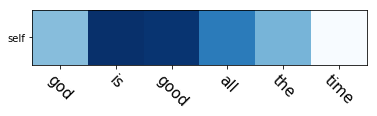

In [9]:
draw_heatmap(normalize([sample.q_attention[0]]), sample.q_text, ['self'], name='self_q_attention')

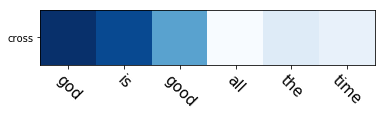

In [10]:
draw_heatmap(normalize([sample.q_attention[1]]), sample.q_text, ['cross'], name='cross_q_attention')

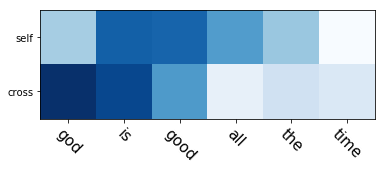

In [11]:
q_attention = normalize(sample.q_attention)
draw_heatmap(q_attention, sample.q_text, ['self', 'cross'], name='q_attention')

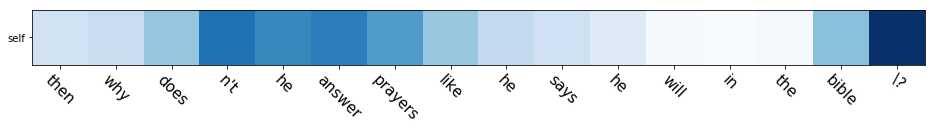

In [12]:
draw_heatmap(normalize([sample.r_attention[0]]), sample.r_text, ['self'], name='self_r_attention')

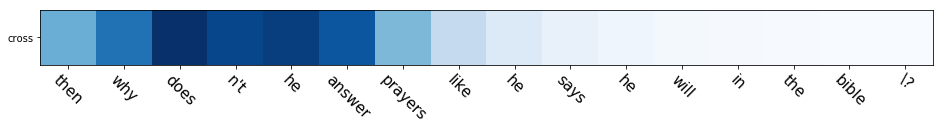

In [13]:
draw_heatmap(normalize([sample.r_attention[1]]), sample.r_text, ['cross'], name='cross_r_attention')

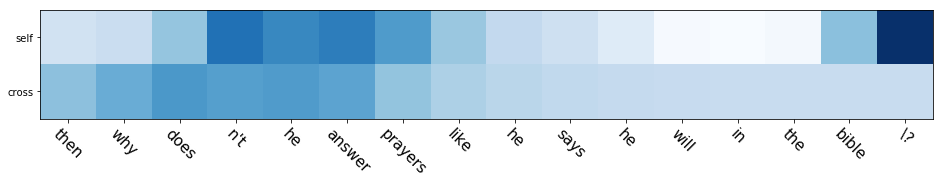

In [14]:
r_attention = normalize(sample.r_attention)
draw_heatmap(r_attention, sample.r_text, ['self', 'cross'], name='r_attention')

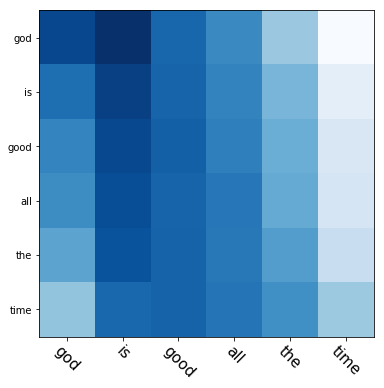

In [31]:
self_q_logits = normalize(sample.self_q_logits)
draw_heatmap(self_q_logits, sample.q_text, sample.q_text, name='self_q_logits')

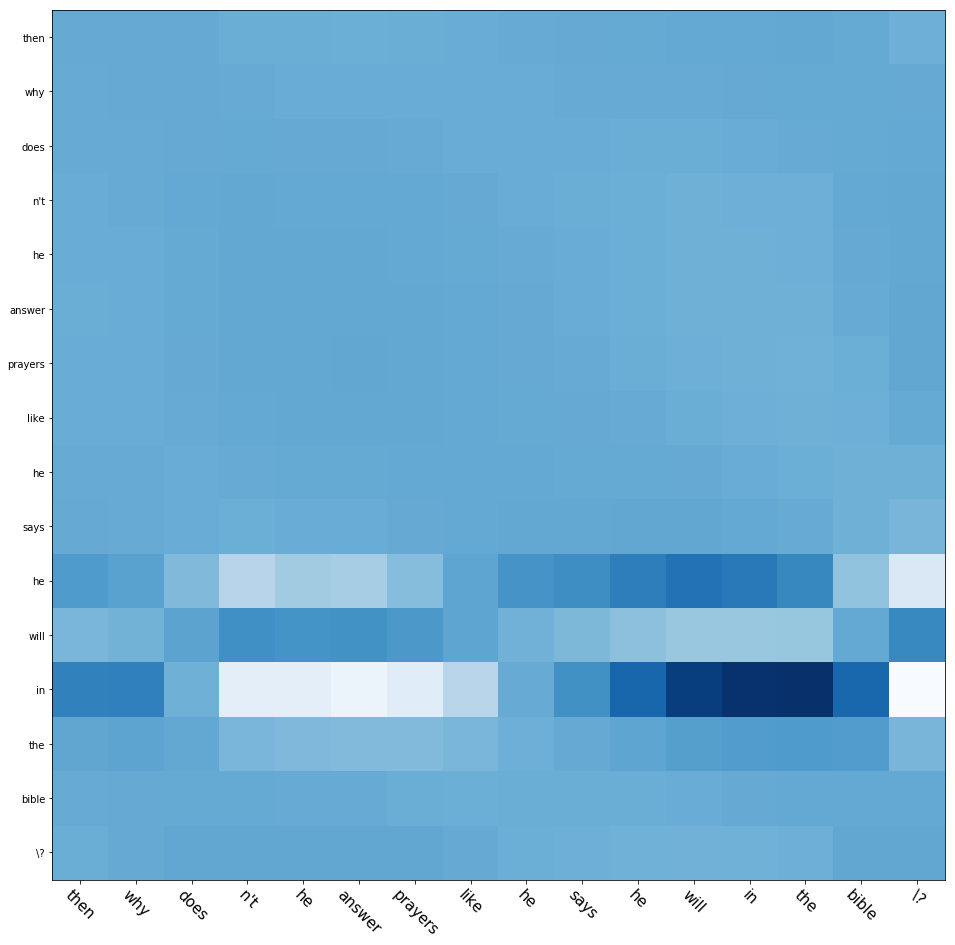

In [32]:
self_r_logits = normalize(sample.self_r_logits)
draw_heatmap(self_r_logits, sample.r_text, sample.r_text, name='self_r_logits')

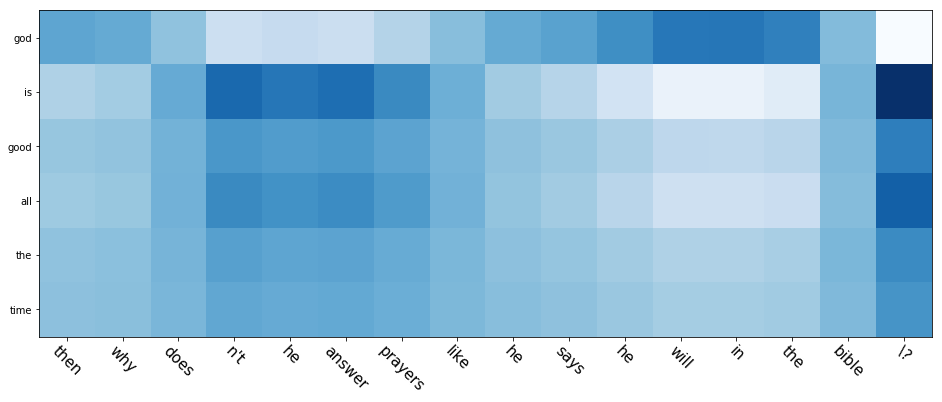

In [33]:
cross_qr_logits = normalize(sample.cross_qr_logits)
draw_heatmap(cross_qr_logits, sample.r_text, sample.q_text, name='cross_qr_logits')

In [6]:
' '.join(sample.q_text)

'god is good all the time'

In [9]:
' '.join(sample.r_text)

"then why does n't he answer prayers like he says he will in the bible ?"

In [8]:
sample.r_text[-1] = '?'

In [11]:
def draw_heatmap_v2(data, xlabels, ylabels, name):
    cmap = cm.Blues
    figure = plt.figure(facecolor='w', figsize=(len(xlabels), len(ylabels)))
    
    for i, attention in enumerate(data):
        attention = [attention]
        label = [ylabels[i]]
        ax = figure.add_subplot(len(ylabels), 1, i+1)
        ax.set_yticks(range(len(label)))
        ax.set_yticklabels(label)
        if i != len(ylabels)-1:
            ax.set_xticks([])
        else:
            ax.set_xticks(range(len(xlabels)))
            ax.set_xticklabels(xlabels)
        vmax = attention[0][0]
        vmin = attention[0][0]
        for i in attention:
            for j in i:
                if j>vmax:
                    vmax = j
                if j<vmin:
                    vmin = j
        maps = ax.imshow(attention, interpolation='nearest', cmap=cmap, aspect='auto', vmin=vmin, vmax=vmax)
        plt.xticks(fontsize=25)
        plt.yticks(fontsize=20)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45)
    plt.savefig('./data/%s.png' % name, dpi=1000, bbox_inches='tight')   
    plt.show()

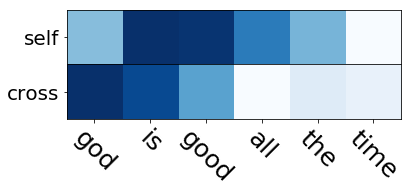

In [12]:
draw_heatmap_v2(sample.q_attention, sample.q_text, ['self', 'cross'], name='q_attention')

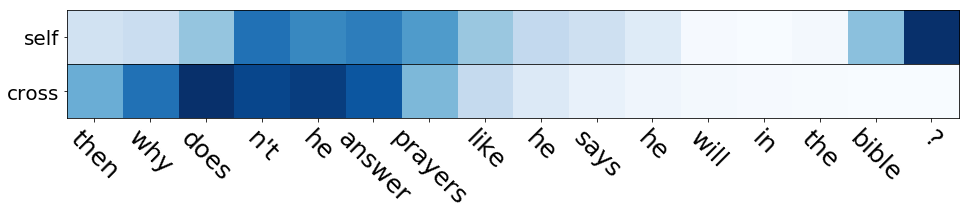

In [13]:
draw_heatmap_v2(sample.r_attention, sample.r_text, ['self', 'cross'], name='r_attention')